## CMPINF 2100 Week 07

### Review: Point Plots

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

We will continue to work with the GAP MINDER data set.

In [2]:
gap_url = 'https://raw.githubusercontent.com/chendaniely/pandas_for_everyone/master/data/gapminder.tsv'

In [3]:
gap_df = pd.read_csv( gap_url, sep = '\t' )

In [4]:
gap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## Point Plot

The Point Plot shows or visualizes the **CONDITIONAL MEAN** of a continuous variable **GIVEN** a CATEGORICAL variable.

That means it is a CATEGORICAL to CONTINUOUS relationship plot.

In Seaborn it is part of the `sns.catplot()` FIGURE LEVEL function family because it is FOCUSED ON categorical groupings!

Usually, the categorical variable is associated with the `x` axis and the continuous variable is associated with the `y` axis.

The CONDITIONAL MEAN of `lifeExp` GIVEN the `year`.

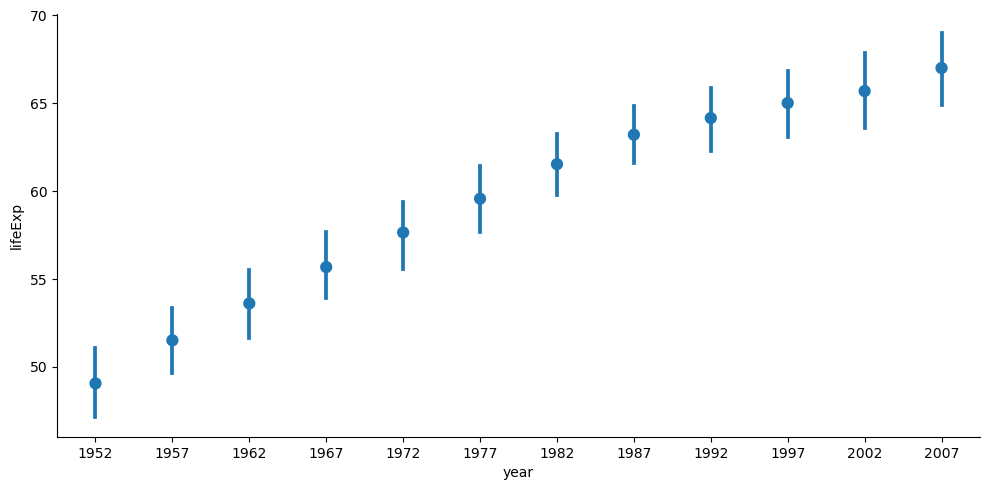

In [6]:
sns.catplot(data = gap_df, x='year', y='lifeExp', kind='point', aspect=2, join=False)

plt.show()

We could have GROUPED BY the `continent` variable.

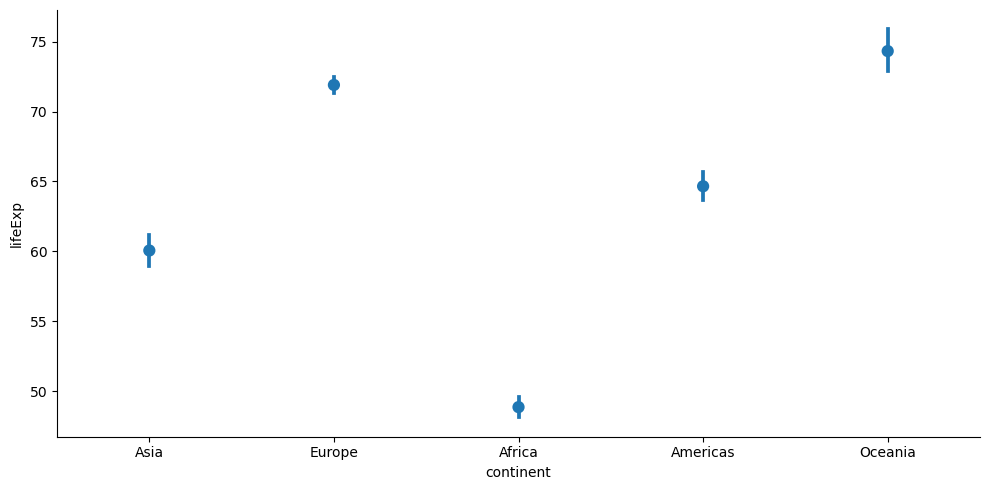

In [7]:
sns.catplot(data = gap_df, x='continent', y='lifeExp', kind='point', aspect=2, join=False)

plt.show()

BUT...we could also GROUP BY 2 categorical variables!!!

One or the PRIMARY categorical variable is associated with the `x` axis while the SECONDARY categorical variable is associated with the marker `hue` or color.

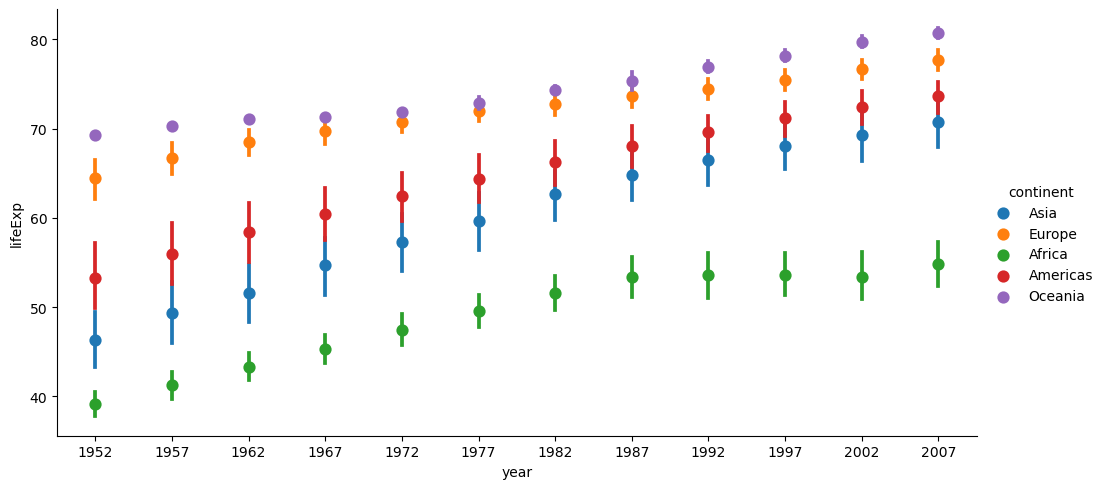

In [8]:
sns.catplot(data = gap_df, x='year', y='lifeExp', hue='continent', kind='point', aspect=2, join=False)

plt.show()

## What is the vertical line?

The vertical line is an ERROR BAR.

The ERROR BAR is showing us by defaul the 95% CONFIDENCE INTERVAL on the AVERAGE!!!

The CONFIDENCE INTERVAL is sometimes denoted as CI.

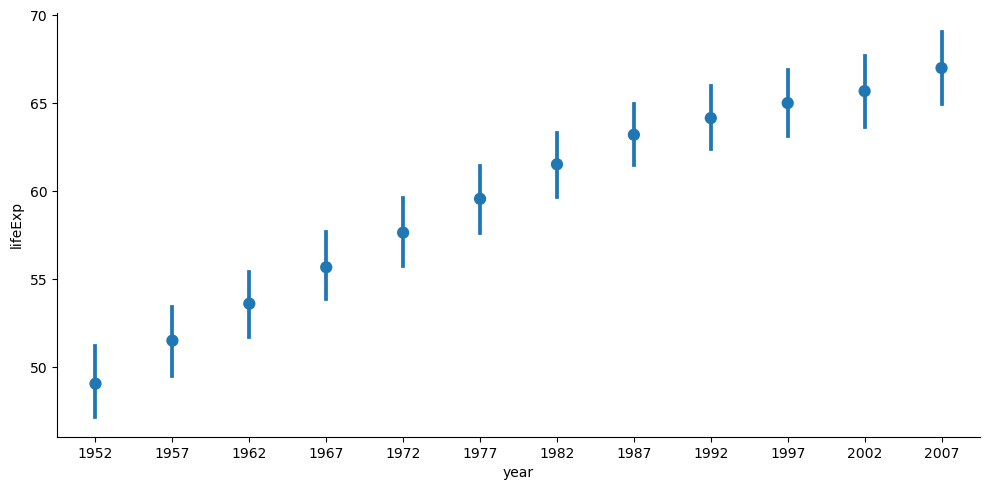

In [9]:
sns.catplot(data = gap_df, x='year', y='lifeExp', kind='point', aspect=2, join=False,
            errorbar=('ci', 95))

plt.show()

We can change the CONFIDENCE INTERVAL size for example we can show the 68% CI.

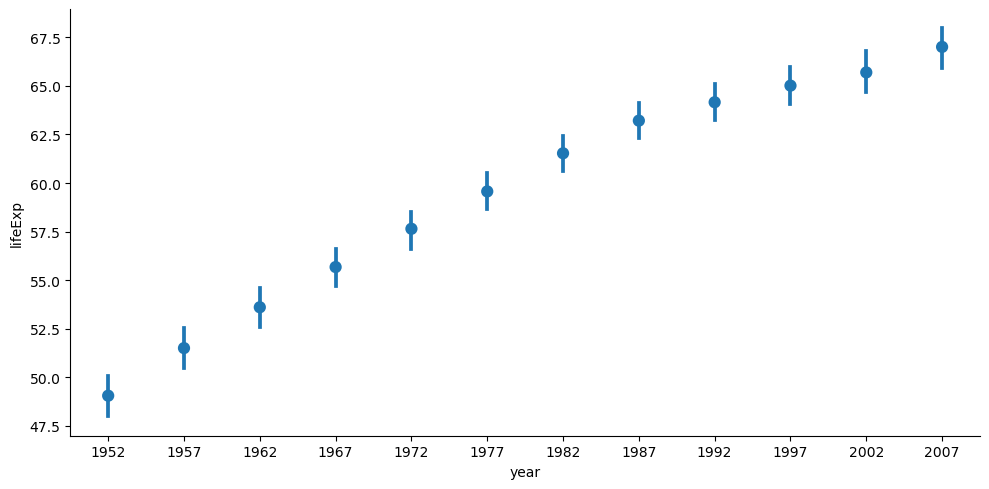

In [10]:
sns.catplot(data = gap_df, x='year', y='lifeExp', kind='point', aspect=2, join=False,
            errorbar=('ci', 68))

plt.show()

But...what is the CI? and **HOW** is the CI calculated???

The CI comes from the SEM!!!!!!!!

The CONFIDENCE INTERVAL is a MULTIPLE of the SEM AROUND the AVERAGE!!!!

Begin...by GROUPING BY the categorical and SUMMARIZING the continuous!!

In [11]:
gap_df.groupby(['year']).\
aggregate(lifeExp_count = ('lifeExp', 'count'),
          lifeExp_avg = ('lifeExp', 'mean'),
          lifeExp_sem = ('lifeExp', 'sem')).\
reset_index()

,year,lifeExp_count,lifeExp_avg,lifeExp_sem
0,1952,142,49.057620,1.025979
1,1957,142,51.507401,1.026427
2,1962,142,53.609249,1.015178
3,1967,142,55.678290,0.983425
4,1972,142,57.647386,0.955152
5,1977,142,59.570157,0.942168
6,1982,142,61.533197,0.903850
7,1987,142,63.212613,0.885864
8,1992,142,64.160338,0.942181
9,1997,142,65.014676,0.970047


Let's assing our GROUPED and SUMMARIZED DataFrame to an object.

In [12]:
gap_year_summary = gap_df.groupby(['year']).\
aggregate(lifeExp_count = ('lifeExp', 'count'),
          lifeExp_avg = ('lifeExp', 'mean'),
          lifeExp_sem = ('lifeExp', 'sem')).\
reset_index()

In [13]:
gap_year_summary

,year,lifeExp_count,lifeExp_avg,lifeExp_sem
0,1952,142,49.057620,1.025979
1,1957,142,51.507401,1.026427
2,1962,142,53.609249,1.015178
3,1967,142,55.678290,0.983425
4,1972,142,57.647386,0.955152
5,1977,142,59.570157,0.942168
6,1982,142,61.533197,0.903850
7,1987,142,63.212613,0.885864
8,1992,142,64.160338,0.942181
9,1997,142,65.014676,0.970047


Let's calculate the 95% CI using the CONDITIONAL MEANS and their respective SEM.

The LOWER BOUND on the 95% CI is the MEAN MINUS 2 TIMES the SEM.

The UPPER BOUND on the 95% CI is the MEAN PLUS 2 TIMES the SEM.

These formulas come from the fact that the distribution on the MEAN is a GAUSSIAN according to the CLT!!!!!!

In [14]:
gap_year_summary['lifeExp_ci_lwr'] = gap_year_summary.lifeExp_avg - 2 * gap_year_summary.lifeExp_sem

gap_year_summary['lifeExp_ci_upr'] = gap_year_summary.lifeExp_avg + 2 * gap_year_summary.lifeExp_sem

In [15]:
gap_year_summary

,year,lifeExp_count,lifeExp_avg,lifeExp_sem,lifeExp_ci_lwr,lifeExp_ci_upr
0,1952,142,49.057620,1.025979,47.005661,51.109579
1,1957,142,51.507401,1.026427,49.454548,53.560255
2,1962,142,53.609249,1.015178,51.578893,55.639606
3,1967,142,55.678290,0.983425,53.711440,57.645139
4,1972,142,57.647386,0.955152,55.737082,59.557691
5,1977,142,59.570157,0.942168,57.685821,61.454494
6,1982,142,61.533197,0.903850,59.725497,63.340898
7,1987,142,63.212613,0.885864,61.440885,64.984340
8,1992,142,64.160338,0.942181,62.275977,66.044700
9,1997,142,65.014676,0.970047,63.074583,66.954769


Return to the POINT PLOT.

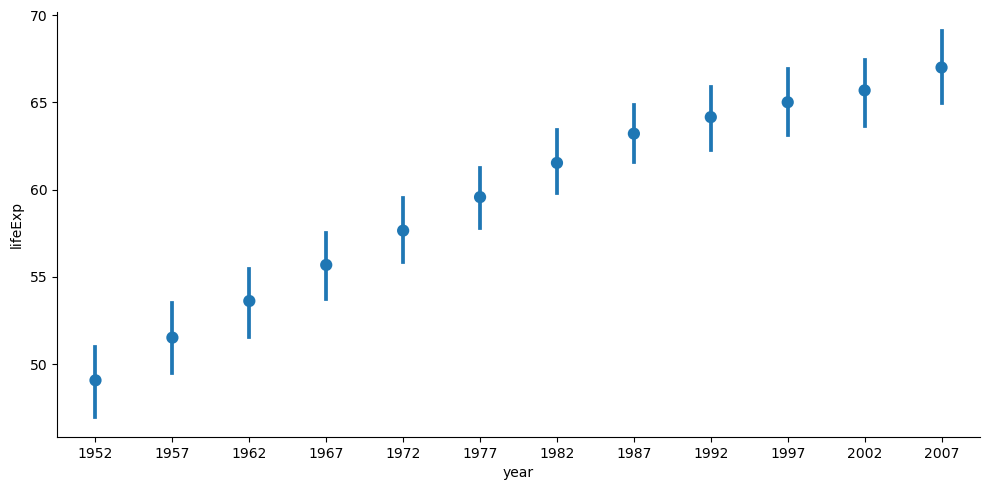

In [16]:
sns.catplot(data = gap_df, x='year', y='lifeExp', kind='point', aspect=2, join=False)

plt.show()

Use the AXIS LEVEL function for greater control.

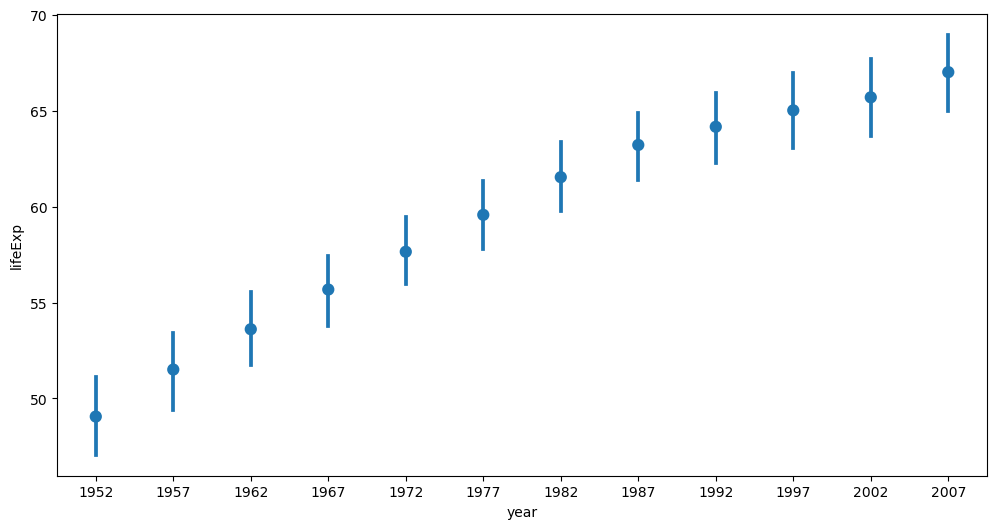

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.pointplot(data = gap_df, x='year', y='lifeExp', join=False, ax=ax)

plt.show()

We can examine the ATTRIBUTES or METHODS for the AXIS object.

In [18]:
ax.get_xlim()

(-0.5, 11.5)

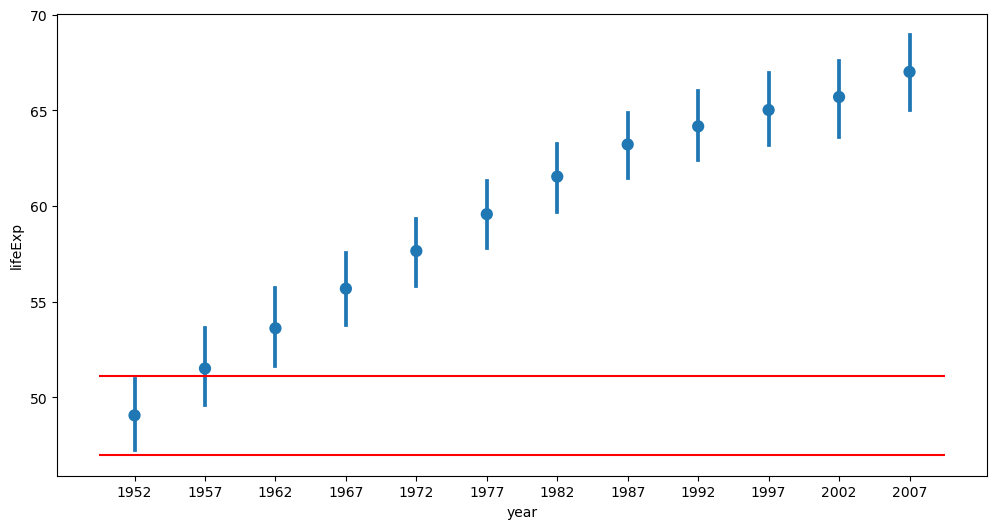

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.pointplot(data = gap_df, x='year', y='lifeExp', join=False, ax=ax)

ax.hlines(y=[47, 51.1], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='r')

plt.show()

In [20]:
gap_year_summary

,year,lifeExp_count,lifeExp_avg,lifeExp_sem,lifeExp_ci_lwr,lifeExp_ci_upr
0,1952,142,49.057620,1.025979,47.005661,51.109579
1,1957,142,51.507401,1.026427,49.454548,53.560255
2,1962,142,53.609249,1.015178,51.578893,55.639606
3,1967,142,55.678290,0.983425,53.711440,57.645139
4,1972,142,57.647386,0.955152,55.737082,59.557691
5,1977,142,59.570157,0.942168,57.685821,61.454494
6,1982,142,61.533197,0.903850,59.725497,63.340898
7,1987,142,63.212613,0.885864,61.440885,64.984340
8,1992,142,64.160338,0.942181,62.275977,66.044700
9,1997,142,65.014676,0.970047,63.074583,66.954769


In Summary...the POINT PLOT performs the FOLLOWING actions for us:

* Calculates the CONDITIONAL MEAN (AVERAGE) for the y-axis variable GIVEN each x-axis CATEGORY
* Calculates the SEM for the y-axis variable GIVEN each x-axis CATEGORY
* Calculates the LOWER BOUND on the CI
* Calculates the UPPER BOUND on the CI
* plots the CONDITIONAL MEAN as a POINT (dot)
* plots the CI as an ERROR BAR between the LOWER and UPPER bounds

In other words the POINT PLOT saves a lot of time when visually exploring data!!!!

Let's see what we would need to do in order to make the plot manually using Pandas plotting methods.

We need to do some data manipulation...

In [22]:
gap_year_summary.set_index('year')

,lifeExp_count,lifeExp_avg,lifeExp_sem,lifeExp_ci_lwr,lifeExp_ci_upr
year,,,,,
1952,142,49.057620,1.025979,47.005661,51.109579
1957,142,51.507401,1.026427,49.454548,53.560255
1962,142,53.609249,1.015178,51.578893,55.639606
1967,142,55.678290,0.983425,53.711440,57.645139
1972,142,57.647386,0.955152,55.737082,59.557691
1977,142,59.570157,0.942168,57.685821,61.454494
1982,142,61.533197,0.903850,59.725497,63.340898
1987,142,63.212613,0.885864,61.440885,64.984340
1992,142,64.160338,0.942181,62.275977,66.044700


In [23]:
gap_year_summary.loc[ :, ['year', 'lifeExp_ci_lwr', 'lifeExp_avg', 'lifeExp_ci_upr']].set_index('year')

,lifeExp_ci_lwr,lifeExp_avg,lifeExp_ci_upr
year,,,
1952,47.005661,49.057620,51.109579
1957,49.454548,51.507401,53.560255
1962,51.578893,53.609249,55.639606
1967,53.711440,55.678290,57.645139
1972,55.737082,57.647386,59.557691
1977,57.685821,59.570157,61.454494
1982,59.725497,61.533197,63.340898
1987,61.440885,63.212613,64.984340
1992,62.275977,64.160338,66.044700


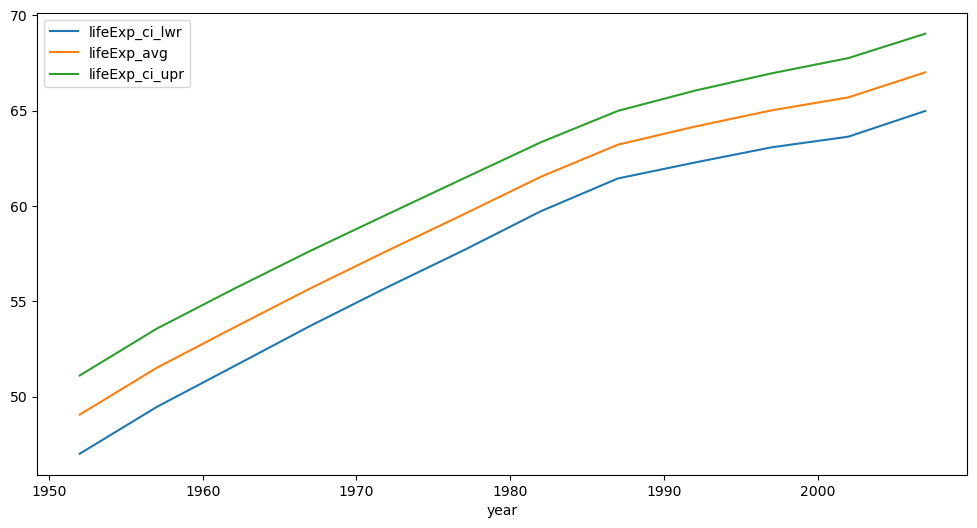

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

gap_year_summary.loc[ :, ['year', 'lifeExp_ci_lwr', 'lifeExp_avg', 'lifeExp_ci_upr']].set_index('year').\
plot(ax=ax)

plt.show()